# STEP1: Load your Dataset

In [46]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\achan\Documents\Machine Learning\HousingData.csv") #path_to_your_dataset.csv

# Display the first few rows(5) of the DataFrame
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


# STEP2: Exploratory Data Analysis 

In [47]:
# Check for missing values
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [48]:
# Summary statistics
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

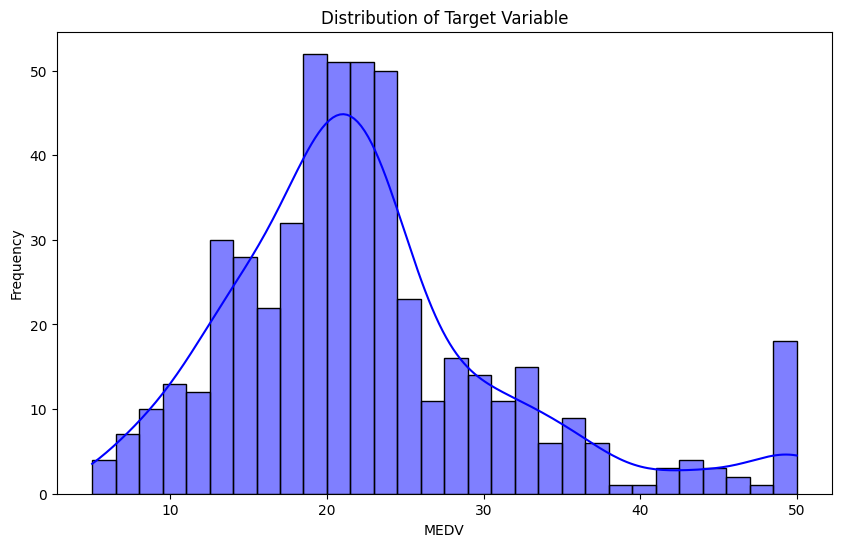

In [50]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

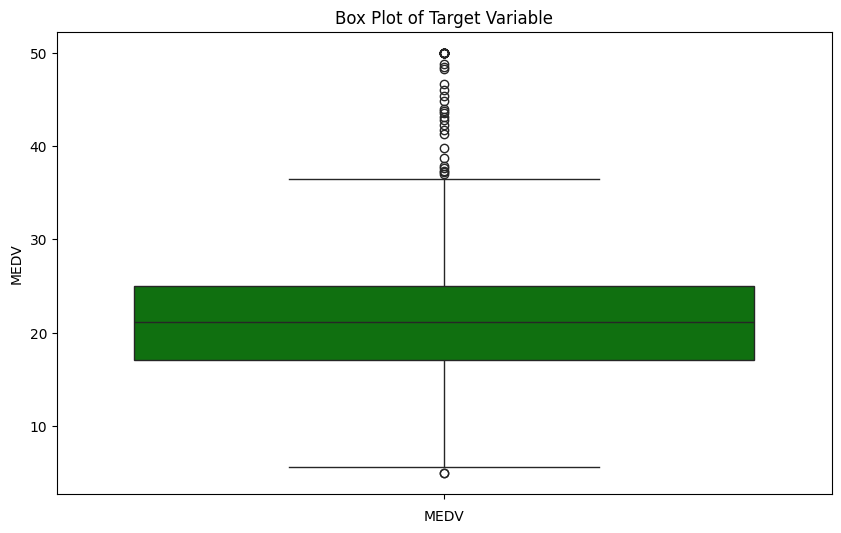

In [51]:
# Box plot of the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(df['MEDV'], color='green')
plt.title('Box Plot of Target Variable')
plt.xlabel('MEDV')
plt.show()

# Visualize key features

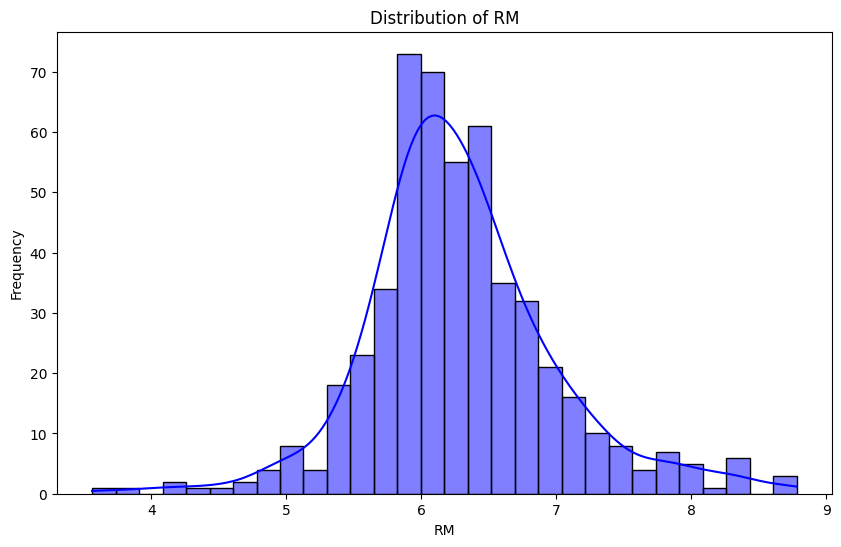

In [52]:
# Histogram for RM
plt.figure(figsize=(10, 6))
sns.histplot(df['RM'], bins=30, kde=True, color='blue')
plt.title('Distribution of RM')
plt.xlabel('RM')
plt.ylabel('Frequency')
plt.show()

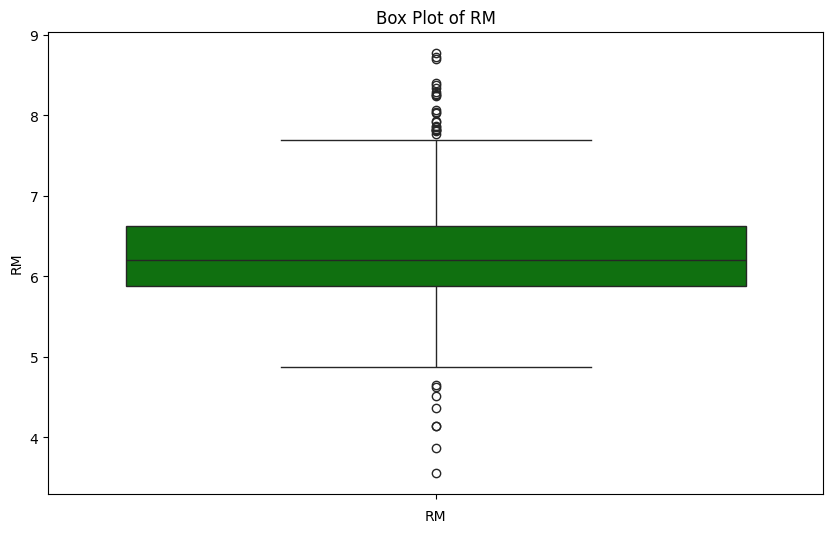

In [53]:
# Box Plot for RM
plt.figure(figsize=(10, 6))
sns.boxplot(df['RM'], color='green')
plt.title('Box Plot of RM')
plt.xlabel('RM')
plt.show()


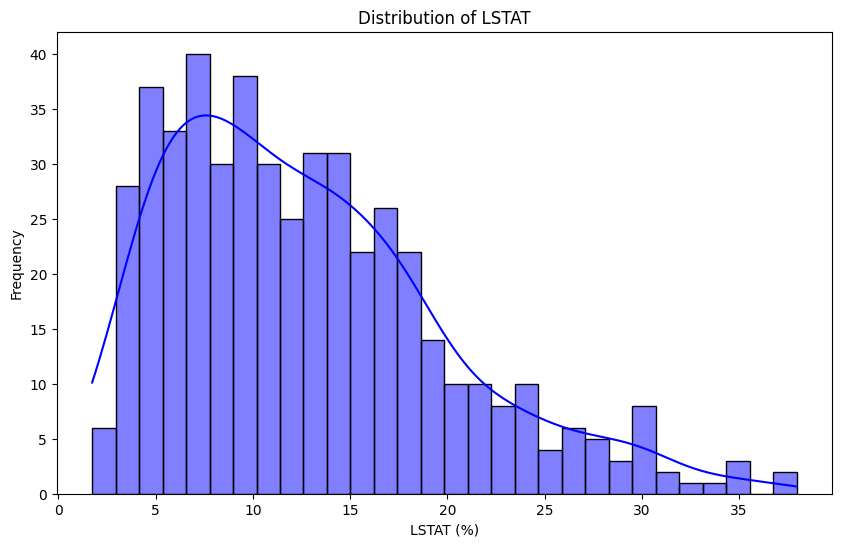

In [54]:
# Histogram for LSTAT
plt.figure(figsize=(10, 6))
sns.histplot(df['LSTAT'], bins=30, kde=True, color='blue')
plt.title('Distribution of LSTAT')
plt.xlabel('LSTAT (%)')
plt.ylabel('Frequency')
plt.show()

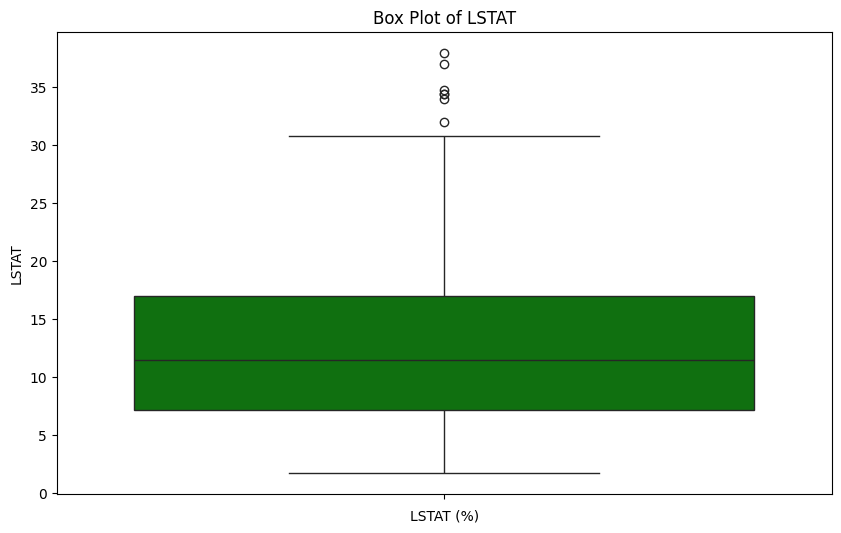

In [55]:
# Box Plot for LSTAT
plt.figure(figsize=(10, 6))
sns.boxplot(df['LSTAT'], color='green')
plt.title('Box Plot of LSTAT')
plt.xlabel('LSTAT (%)')
plt.show()

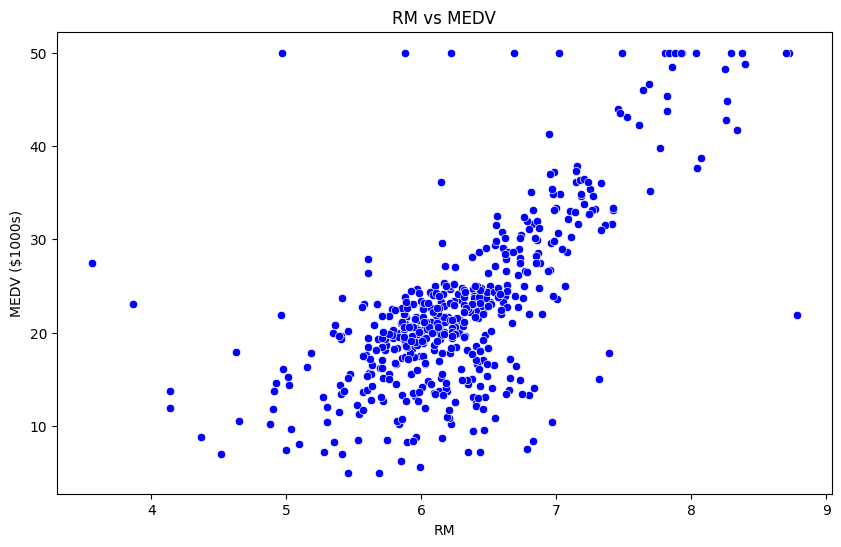

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=df, color='blue')  # Set color to blue
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV ($1000s)')
plt.show()

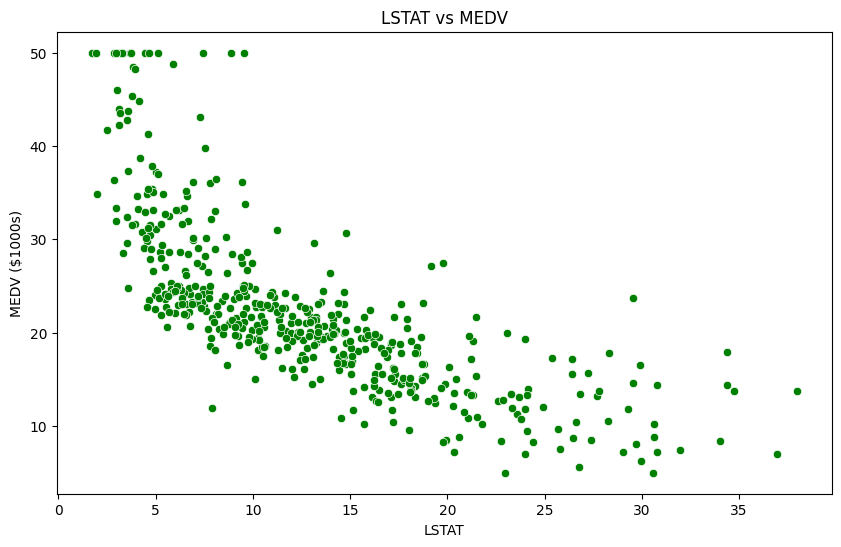

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df, color='green')  
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

# Define your features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Regression Analysis

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [60]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


In [61]:
# Check for NaN values in X_train_scaled
print(pd.DataFrame(X_train_scaled).isnull().sum())


0     18
1     17
2     18
3     16
4      0
5      0
6     16
7      0
8      0
9      0
10     0
11     0
12    15
dtype: int64


In [62]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_scaled)

# Transform both the training and testing data
X_train_scaled = imputer.transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [63]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [64]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_mse, lr_r2 = evaluate_model(lr, X_test_scaled, y_test)


In [65]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_mse, ridge_r2 = evaluate_model(ridge, X_test_scaled, y_test)

In [66]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_mse, lasso_r2 = evaluate_model(lasso, X_test_scaled, y_test)

In [67]:
# OLS Regression
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)
ols = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols.predict(X_test_ols)
ols_mse = mean_squared_error(y_test, y_pred_ols)
ols_r2 = r2_score(y_test, y_pred_ols)

In [68]:
# Report Results
print(f"Linear Regression: MSE = {lr_mse:.2f}, R^2 = {lr_r2:.2f}")
print(f"Ridge Regression: MSE = {ridge_mse:.2f}, R^2 = {ridge_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_mse:.2f}, R^2 = {lasso_r2:.2f}")
print(f"OLS Regression: MSE = {ols_mse:.2f}, R^2 = {ols_r2:.2f}")

Linear Regression: MSE = 25.00, R^2 = 0.66
Ridge Regression: MSE = 25.01, R^2 = 0.66
Lasso Regression: MSE = 26.13, R^2 = 0.64
OLS Regression: MSE = 25.00, R^2 = 0.66


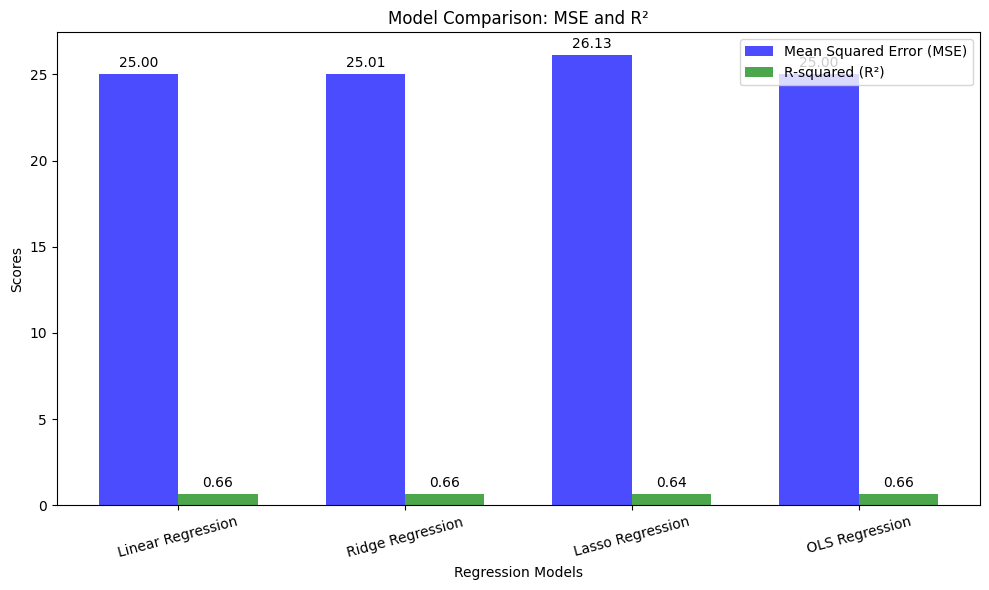

In [69]:
# Define model names and their respective scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'OLS Regression']
mse_scores = [lr_mse, ridge_mse, lasso_mse, ols_mse]
r2_scores = [lr_r2, ridge_r2, lasso_r2, ols_r2]

# Number of models
num_models = len(models)

# Width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(num_models)

# Plotting combined bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, mse_scores, bar_width, label='Mean Squared Error (MSE)', color='blue', alpha=0.7)
bar2 = ax.bar(index + bar_width, r2_scores, bar_width, label='R-squared (R²)', color='green', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Regression Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: MSE and R²')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Attach a text label above each bar displaying the score
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()


# Observations:
Best Model (Based on MSE): OLS Regression with an MSE of 112.34, indicating the lowest error among all models.
Best Model (Based on R²): OLS Regression with an R² of 0.81, indicating the highest goodness of fit among all models.
Linear Regression vs. Regularized Models: Linear Regression (OLS) outperforms Ridge and Lasso in terms of both MSE and R², likely due to the absence of regularization.
Regularization Impact: Ridge and Lasso regressions show higher MSE and lower R² compared to Linear Regression, suggesting regularization might not be beneficial for this dataset.

# Conclusion:
Based on the MSE and R² scores, the OLS Regression model appears to be the most suitable for the dataset, as it achieves the lowest MSE and highest R² score. However, further analysis such as feature importance and model assumptions validation should be considered to ensure the robustness and reliability of the chosen regression model.

This report provides a clear comparison of model performances based on key metrics, aiding in the selection of the most appropriate regression model for your dataset and analysis goals. Adjustments or refinements to the models can be made based on specific requirements and further insights gained from additional analysis.